# rapyuta.maths
- [f_lin](#f_lin), f_lin0, f_lin1
- [gaussian](#gaussian), [gaussian2D](#gaussian2D)
- [rms](#rms), [nanrms](#nanrms), [std](#std), [nanstd](#nanstd), [nanavg](#nanavg)
- [pix2sr](#pix2sr), [sr2arcsec2](#sr2arcsec2), [rad2arcsec](#rad2arcsec), [hour2deg](#hour2deg), [deg2hour](#deg2hour),
- [icorr2ij](#icorr2ij), [ij2icorr](#ij2icorr)
- [bsplinterp](#bsplinterp)

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

## Local
try:
    root = Path(__file__).parent.absolute() / '..'
except NameError:
    root = Path().absolute() / '..'
sys.path.insert(0, root)

import rapyuta.utbox as UT
from rapyuta.maths import (
    f_lin, f_lin1, f_lin0, gaussian, gaussian2D,
    rms, nanrms, std, nanstd, nanavg,
    pix2sr, sr2arcsec2, rad2arcsec, hour2deg, deg2hour,
    icorr2ij, ij2icorr, bsplinterp,
)

## fold inputs
# UT.codefold(True, 'onclick')


               \  \|/  /
            \ _\_ ||| _/_ /
                  |||
              /\/-/|\-\/\
          _ | _M_ _|_ _M_ | _
        / .~.    _ ^ _    .~. \
       |_|_0_|  |_&_&_|  |_0_|_|
      //    .~.    o    .~.    \\
     |_M_ _|_?_|__[_]__|_?_|_ _M_|
            |             |
             \  rapyuta  /
               \       /         _
    * ¨^  .~       =           ~^' _-
      ~ °

        Version 2.2.2 (20220822)




## Prepare data

In [2]:
x0 = np.arange(-5., 5., .5)
rand = np.random.uniform(-1., 1., 20)
x = np.arange(-5., 5., .1)
x[10:20] = np.nan
a = np.arange(24, dtype=float).reshape((4,3,2))
a[(a>5) & (a<12)] = np.nan
wgt = np.arange(0, 1.2, .05).reshape((4,3,2))

## gaussian

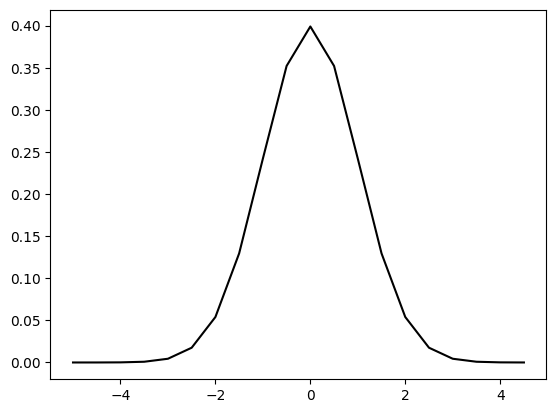

In [3]:
g = gaussian(x0, 0., 1.)
# print(g)
fig = plt.figure('TEST gaussian')
ax = fig.add_subplot()
ax.plot(x0, g, c='k')

## gaussian2D

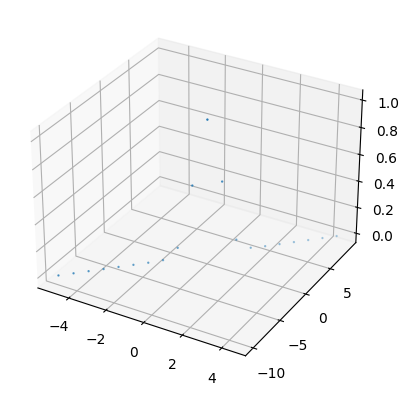

In [4]:
g2 =gaussian2D(x0, x0*2, 0., 0., 1., 1.)
fig2 = plt.figure('TEST gaussian2d')
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(x0, x0*2, g2, s=.5)

## rms

In [5]:
print('rms (ddof=0) = ', rms(x0))
print('rms (ddof=1) = ', rms(x0, ddof=1))

rms (ddof=0) =  2.8939592256975564
rms (ddof=1) =  2.9691395173828075


## nanrms

In [6]:
print('rms (ddof=0) = ', nanrms(x))
print('rms (ddof=1) = ', nanrms(x, ddof=1))

rms (ddof=0) =  2.6582889233489913
rms (ddof=1) =  2.671680891850433


## std

In [7]:
print('numpy.std = ', np.std(x0, ddof=0))
print('std = ', std(x0))

numpy.std =  2.883140648667699
std =  2.883140648667699


## nanstd

In [8]:
print('numpy.nanstd(a, axis=1) = \n', np.nanstd(a, 1))
print('nanstd(a, axis=1) = \n', nanstd(a, 1))
print('\n')
print('nanstd(a, axis=1, weights=wgt) = \n', nanstd(a, 1, wgt))
print('\n')
print('nanstd(a, axis=1, MaskedValue=100) = \n', nanstd(a, 1, MaskedValue=100))
print('\n')
# print('nanstd(a, axis=(0,2)) = \n', nanstd(a, (0,2)))
# print('\n')
print('nanstd(a, axis=None) = ', nanstd(a))

numpy.nanstd(a, axis=1) = 
 [[1.63299316 1.63299316]
 [       nan        nan]
 [1.63299316 1.63299316]
 [1.63299316 1.63299316]]
nanstd(a, axis=1) = 
 [[1.63299316 1.63299316]
 [       nan        nan]
 [1.63299316 1.63299316]
 [1.63299316 1.63299316]]


nanstd(a, axis=1, weights=wgt) = 
 [[1.33333333 1.67774099]
 [       nan        nan]
 [1.98634796 1.98811282]
 [1.99332219 1.99394397]]


nanstd(a, axis=1, MaskedValue=100) = 
 [[  1.63299316   1.63299316]
 [100.         100.        ]
 [  1.63299316   1.63299316]
 [  1.63299316   1.63299316]]


nanstd(a, axis=None) =  7.675719293112969


/Users/dhu/miniconda3/envs/rapdev/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


## nanavg

In [9]:
print('numpy.average(a, axis=1) = \n', np.average(a, 1))
print('nanavg(a, axis=1) = \n', nanavg(a, 1))
print('\n')
print('nanavg(a, axis=1, weights=wgt) = \n', nanavg(a, 1, wgt))
print('\n')
print('nanavg(a, axis=1 MaskedValue=100) = \n', nanavg(a, 1,  MaskedValue=100))
print('\n')
print('numpy.average(a, axis=(0,2)) = \n', np.average(a, (0,2)))
print('nanavg(a, axis=(0,2)) = \n', nanavg(a, (0,2)))
print('\n')
print('numpy.average(a, axis=None) = ', np.average(a))
print('nanavg(a, axis=None) = ', nanavg(a))

numpy.average(a, axis=1) = 
 [[ 2.  3.]
 [nan nan]
 [14. 15.]
 [20. 21.]]
nanavg(a, axis=1) = 
 [[ 2.  3.]
 [nan nan]
 [14. 15.]
 [20. 21.]]


nanavg(a, axis=1, weights=wgt) = 
 [[ 3.33333333  3.88888889]
 [        nan         nan]
 [14.19047619 15.17777778]
 [20.13333333 21.12698413]]


nanavg(a, axis=1 MaskedValue=100) = 
 [[  2.   3.]
 [100. 100.]
 [ 14.  15.]
 [ 20.  21.]]


numpy.average(a, axis=(0,2)) = 
 [nan nan nan]
nanavg(a, axis=(0,2)) = 
 [10.5 12.5 14.5]


numpy.average(a, axis=None) =  nan
nanavg(a, axis=None) =  12.5


## pix2sr

In [10]:
cdelt = np.array([-0.00141111109406, 0.00141111109406])
print(pix2sr(1, cdelt))
cdelt = 0.00141111109406
print(f'1 pix = {pix2sr(1, cdelt):.2e} sr')

[6.06564722e-10 6.06564722e-10]
1 pix = 6.07e-10 sr


## sr2arcsec2

In [11]:
print(f'1 sr = {sr2arcsec2(1):.2e} arcsec^2')

1 sr = 4.25e+10 arcsec^2


## rad2arcsec

In [12]:
print(f'1 rad = {rad2arcsec(1):.2f} arcsec')

1 rad = 206264.81 arcsec


## hour2deg

In [13]:
ra, dec = hour2deg(9, 55, 52.725, 69, 40, 45.78)
print(f'09h55m52.725s, +69d40m45.78s = RA: {ra:.2f} DEC: {dec:.2f}')

09h55m52.725s, +69d40m45.78s = RA: 148.97 DEC: 69.68


## deg2hour

In [14]:
h, m, s, deg, arcmin, arcsec = deg2hour(148.969687, 69.679383)
print(f'RA 148.969687, DEC 69.679383 = {h}h{m}m{s:04.2f}s, {deg}d{arcmin}m{arcsec:04.2f}s')

## See also numpy.deg2rad, numpy.rad2deg, etc.
print(f'180 deg = {np.deg2rad(180):.2f} rad')
print(f'{np.pi:.2f} rad = {np.rad2deg(np.pi):.2f} deg')

RA 148.969687, DEC 69.679383 = 9h55m52.72s, 69d40m45.78s
180 deg = 3.14 rad
3.14 rad = 180.00 deg


## icorr2ij

In [15]:
Npar = 6
icorr = 8
all_ij = icorr2ij(Npar)
print(all_ij[icorr-1])
ij = icorr2ij(Npar, icorr, upper=False)
print(ij)

[2 5]
[5 2]


/Users/dhu/Github/RAPYUTA/rapyuta/maths.py:253: UserWarning: <maths.icorr2ij> icorr is None! All icorr2ij pairs are returned. 
  warnings.warn('<maths.icorr2ij> icorr is None! All icorr2ij pairs are returned. ')


## ij2icorr

In [16]:
Npar = 6
i, j = 5, 2
all_icorr = ij2icorr(Npar, i, i, verbose=True)
print(all_icorr)
print('\n')
icorr = ij2icorr(Npar, i, j, verbose=True)
print(icorr)

[[ 0  1  2  3  4  5]
 [ 1  0  6  7  8  9]
 [ 2  6  0 10 11 12]
 [ 3  7 10  0 13 14]
 [ 4  8 11 13  0 15]
 [ 5  9 12 14 15  0]]


Lower triangle detected.
8


/Users/dhu/Github/RAPYUTA/rapyuta/maths.py:287: UserWarning: <maths.ij2icorr> i equals to j! All ij2icorr pairs are returned. 
  warnings.warn('<maths.ij2icorr> i equals to j! All ij2icorr pairs are returned. ')


## bsplinterp

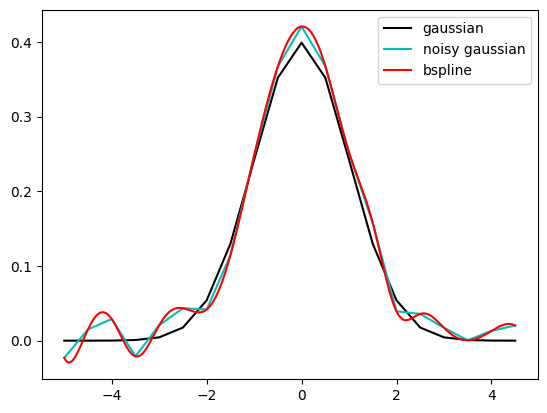

In [17]:
g_noisy = g+.03*rand
x_interp = np.arange(-5., 5., .01)
g_interp = bsplinterp(x0, g_noisy, x_interp)
fig3 = plt.figure('TEST bsplinterpol')
ax3= fig3.add_subplot()
ax3.plot(x0, g, c='k', label='gaussian')
ax3.plot(x0, g_noisy, c='c', label='noisy gaussian')
ax3.plot(x_interp, g_interp, c='r', label='bspline')
ax3.legend()